In [1]:
import pymysql
import pandas as pd
import Analyzer
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import os
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
mk = Analyzer.MarketDB()

mk.get_daily_price('동화약품', '2019-01-01', '2020-09-28')

In [ ]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-01')

df['MA20'] = df["close"].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df["PB"] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3 
df['PMF'] = 0
df['NMF'] = 0

for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else :
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0

df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MFI10'] = 100 - 100 / (1 + df['MFR'])
df = df[19:] # 19행까지는 NaN값이기 때문에 20번째 행부터

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], color = '#0000ff', label = "Close")
plt.plot(df.index, df['upper'], 'r--', label = "Upper band")
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color = '0.9')
plt.title("NAVER Bollinger Band (20 day, 2 std) - Trend Following")

for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc = 'best')
    
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, color = 'b', label = '%B x 100')
plt.plot(df.index, df['MFI10'], 'g--', label = 'MFI(10day)')
plt.yticks([-20, 0, 20, 40 ,60, 80, 100, 120])

for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')

        plt.grid(True)
plt.legend(loc = 'best')

# 이미지 저장
if os.path.isdir('image') == True:
    pass
else :
    os.mkdir('image')
plt.savefig('image/NAVER Bollinger Band(MFI).png', bbox_inches='tight')

plt.show()

In [ ]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2018-11-01')

df['MA20'] = df["close"].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df["PB"] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close'] - df['high'] - df['lower']) / (df['high'] - df['lower']) * df['volume'] # 일중강도
df['IIP21'] = df.II.rolling(window = 21).sum()*100 # 일중 강도율
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title("NAVER Bollinger Band(20 day, 2 std) - Reversals")
plt.plot(df.index, df['close'], 'b', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.fill_between(df.index, df['upper'], df['lower'], color = '0.9')

plt.legend(loc = 'best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label = '%b')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.bar(df.index, df.IIP21, color = 'g', label = "II% 21day")
plt.grid(True)
plt.legend(loc = 'best')

# 이미지 저장
if os.path.isdir('image') == True:
    pass
else :
    os.mkdir('image')
plt.savefig('image/NAVER Bollinger Band(20 day, 2 std) - Reversals.png', bbox_inches='tight')

plt.show()

In [ ]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2018-11-01')

df['MA20'] = df["close"].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df["PB"] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close'] - df['high'] - df['lower']) / (df['high'] - df['lower']) * df['volume'] # 일중강도
df['IIP21'] = df.II.rolling(window = 21).sum()*100 # 일중 강도율
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title("NAVER Bollinger Band(20 day, 2 std) - Reversals")
plt.plot(df.index, df['close'], 'b', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.fill_between(df.index, df['upper'], df['lower'], color = '0.9')

for i in range(len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] >0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
        
plt.legend(loc = 'best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label = '%b')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.bar(df.index, df['IIP21'], color = 'g', label = 'II% 21day')

for i in range(len(df.close)):
    # 주가가 하단 볼린저 밴드에 닿을 때, 일중 강도율이 +이면 매수
    # 주가가 상단 볼린저 밴드에 닿을 때, 일중 강도율이 -이면 매도
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # 매수 시점을 빨간색 삼각형으로 표시
    elif df.PB.values[i] >0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # 매도 시점을 파란색 삼각형으로 표시
        
plt.grid(True)
plt.legend(loc = 'best')

# 이미지 저장
if os.path.isdir('이미지') == True:
    pass
else :
    os.mkdir('이미지')
plt.savefig('이미지/NAVER Bollinger Band(20 day, 2 std) - Reversals.png', bbox_inches='tight')

plt.show()

end_date is initialized to '2020-10-07'


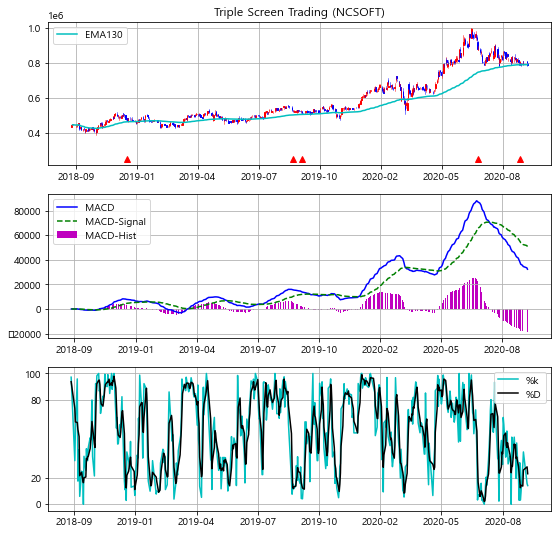

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2018-09-01')

ema60 = df.close.ewm(span=60).mean() # 종가의 12주 지수 이동평균에 해당하는 60일 이동지수 평균
ema130 = df.close.ewm(span=130).mean() # 종가의 26주 지수 이동평균에 해당하는 130일 이동지수 평균
macd = ema60 -ema130
signal = macd.ewm(span=45).mean() # MACD의 9주 지수 이동평균을 신호선으로 저장
macdhist = macd - signal 
df = df.assign(ema130 = ema130, ema60 = ema60, macd = macd, signal = signal, macdhist = macdhist).dropna()

df['number'] = df.index.map(mdates.date2num) # 캔들차트에 사용할 수 있게 숫자형으로 변환
ohlc = df[['number', 'open', 'high', 'low', 'close']]

ndays_high = df.high.rolling(window = 14, min_periods = 1).max() # 14일 동안의 최댓값
ndays_low = df.low.rolling(window = 14, min_periods = 1).min() # 14일 동안의 최솟값

fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window = 3).mean()
df = df.assign(fast_k = fast_k, slow_d = slow_d).dropna() # DF생성 후 결측치 처리

# 삼중창의 첫 번째 창 = 시장 조류(장기 차트 분석)
plt.figure(figsize=(9, 9))
p1 = plt.subplot(3, 1, 1)
plt.title('Triple Screen Trading (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width = .6, colorup = 'red', colordown = 'blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color ='c', label = 'EMA130')

for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and df.slow_d.values[i-1] >= 20 and df.slow_d.values[i] <20:
        plt.plot(df.number.values[i], 250000, 'r^')
    elif df.ema130.values[i-1] > df.ema130.values[i] and df.slow_d.values[i-1] <= 80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], 250000, 'bv')
plt.legend(loc = 'best')

# 삼중창의 두 번째 창 = 첫 번째 창의 추세 방향과 역행하는 파도 파악(오실레이터)
p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color ='m', label = 'MACD-Hist')
plt.plot(df.number, df['macd'], color ='b', label = 'MACD')
plt.plot(df.number, df['signal'], 'g--', label = 'MACD-Signal')
plt.legend(loc = 'best')

# 삼중창의 세 번째 창 = 첫 번째 창과 두 번째 창이 동시에 매매 신호를 낼 때, 진입시접 파악
p3 = plt.subplot(3, 1, 3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color = 'c', label = '%k')
plt.plot(df.number, df['slow_d'], color = 'k', label = '%D')
plt.yticks([0, 20, 80, 100]) # 스토캐스틱의 기준선
plt.legend(loc = 'best')

# 이미지 저장
if os.path.isdir('image') == True:
    pass
else :
    os.mkdir('image')
plt.savefig('image/Triple Screen Trading (NCSOFT).png', bbox_inches='tight')

plt.show()

### 듀얼 모멘텀

In [ ]:
import pandas as pd
import pymysql
from datetime import datetime
from datetime import timedelta
import Analyzer

class DualMomnetum:
    def __init__(self):
        """생성자 : KRX 종목코드(codes)를 구하기 위한 MarketDB 객체 생성"""
    self.mk = Analyzer.MarketDB()
    
    def get_rltv_momentum(self, start_date, end_date, stock_count):
        """특정 기간 동안 수익률이 제일 높았던 stock_count 개의 종목들(상대 모멘텀)
            - start_date  : 상대 모멘텀을 구할 시작일자 ('2020-01-01')
            - end_date    : 상대 모멘텀을 구할 종료일자 ('2020-12-31')
            - stock_count : 상대 모멘텀을 구할 종목수
            """
        connection = pymysql.connect(host = 'localhost', port = 3306, db = 'INVESTAR',
                                    user = 'root', passwd = '1234', autocommit = True)
        cursor = connection.cursor()
        
        # 사용자가 입력한 시작일자를 DB에서 조회되는 일자로 보정
        sql = f"select max(date) from dauly_price where date <= '{start_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        
        if (result[0] is None):
            print("start_date : {} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d')
        
        # 사용자가 입력한 종료일자를 DB에서 조회되는 일자로 보정
        sql = f"select max(date) from dauly_price where date <= '{end_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print("end_date : {} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d')
        
        # KRX 종목별 수익률을 구해서 2차원 리스트 형태로 추가
        rows = []
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(self.mk.codes):
            sql = f"select close from daily_price "|
                f"where code='{code}' and date= '{start_date}'"
                cursor.execute(sql)
                result = cursor.fetchone()
                if (result is None):
                    continue
                old_price = int(result[0])
                sql = f"select close from daily_price "|
                    f"where code='{code}' and date='{end_date}'"
                cursor.execute(sql) 